In [7]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import OneHotEncoder
from PIL import Image, ImageEnhance
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sys
import yaml

# For ML Models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from IPython.core.display import Image

from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns

In [8]:
try:
    with open ("../config.yaml", 'r') as file:
        config = yaml.safe_load(file)
except Exception as e:
    print('Error reading the config file')
sys.path.insert(0, os.path.abspath(config['lib']))
import final_model_functions as f

In [15]:
model = tf.keras.models.load_model(config['models']+'/model.model')

In [36]:
image = ('../src/pics/'+input('Please enter file name'))

Please enter file name glioma3.jpg


100.0% Conclusion: No, Its not a tumor


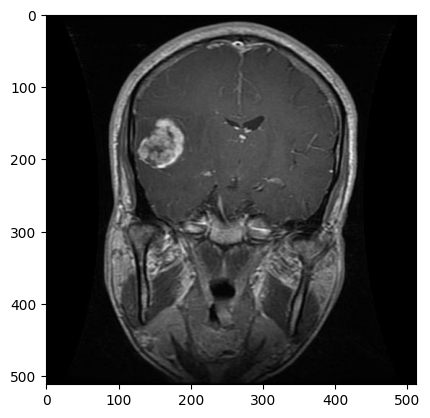

In [37]:
img = Image.open(image)
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(conclusion(classification))